<a href="https://colab.research.google.com/github/karaage0703/karaage-ai-book/blob/master/ch03/03_karaage_ai_book_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# テキスト分析

テキスト分析のノートブックです。

## データの前処理
AIに学習させるための下準備として、学習させるデータに対して、以下の処理を順に実施します。

1. 教師データのダウンロード
1. 教師データのテキストを分かち書きする
1. 不要なデータを削除する

ただ、3の不要なデータの削除は、現段階では分からないので一旦データを可視化してから再度実施することにします。

### 教師データのダウンロード

青空文庫のテキストデータをGitHubからダウンロードします。

In [1]:
!wget https://github.com/aozorabunko/aozorabunko/raw/master/cards/000096/files/2093_ruby_28087.zip
!unzip 2093_ruby_28087.zip

--2020-10-19 14:30:09--  https://github.com/aozorabunko/aozorabunko/raw/master/cards/000096/files/2093_ruby_28087.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aozorabunko/aozorabunko/master/cards/000096/files/2093_ruby_28087.zip [following]
--2020-10-19 14:30:09--  https://raw.githubusercontent.com/aozorabunko/aozorabunko/master/cards/000096/files/2093_ruby_28087.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 421747 (412K) [application/zip]
Saving to: ‘2093_ruby_28087.zip’

2093_ruby_28087.zip 100%[===================>] 411.86K  --.-KB/s    in 0.07s   

2020-10-19 14:30:10 (5.71 MB/s) - ‘

文字コードを nkf で調べます。最初にnkfをインストールします。

In [2]:
!apt-get install nkf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  nkf
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 128 kB of archives.
After this operation, 309 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 nkf amd64 1:2.1.4-1ubuntu2 [128 kB]
Fetched 128 kB in 1s (104 kB/s)
Selecting previously unselected package nkf.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../nkf_1%3a2.1.4-1ubuntu2_amd64.deb ...
Unpacking nkf (1:2.1.4-1ubuntu2) ...
Setting up nkf (1:2.1.4-1ubuntu2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


文字コードを調べます。

In [3]:
!nkf --guess dogura_magura.txt

Shift_JIS (CRLF)


文字コードに対応して、ファイルを読み込みます。

In [4]:
text_list = []
with open('dogura_magura.txt', encoding='shift_jis') as f:
  text_list = f.readlines()

読み込めたか、冒頭のテキストを確認します。

In [5]:
text_list[0:10]

['ドグラ・マグラ\n',
 '夢野久作\n',
 '\n',
 '-------------------------------------------------------\n',
 '【テキスト中に現れる記号について】\n',
 '\n',
 '《》：ルビ\n',
 '（例）蜜蜂《みつばち》\n',
 '\n',
 '｜：ルビの付く文字列の始まりを特定する記号\n']

### データの前処理


形態素解析ライブラリの「janome」をインストール

In [6]:
!pip install janome

     |████████████████████████████████| 19.7MB 1.6MB/s 


サンプルの文章を形態素解析して、分かち書き

In [7]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
tokens = t.tokenize("私はからあげが好きです")

words = []
for token in tokens:
    print(token)
    words.append(token.surface)

text = ' '.join(words)
print(text)

私	名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
から	助詞,格助詞,一般,*,*,*,から,カラ,カラ
あげ	動詞,自立,*,*,一段,連用形,あげる,アゲ,アゲ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
好き	名詞,形容動詞語幹,*,*,*,*,好き,スキ,スキ
です	助動詞,*,*,*,特殊・デス,基本形,です,デス,デス
私 は から あげ が 好き です


In [8]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
words = []
for text in text_list:
    tokens = t.tokenize(text)
    for token in tokens:
        pos = token.part_of_speech.split(',')[0]
        if pos == '名詞':
            words.append(token.surface)

text = ' '.join(words)

中身を確認

In [9]:
print(text[500:600]) # for debug

 余韻 そこ ら 中 ヒッソリ 私 眼 白 ペンキ 塗 天井 裏 薄 塵埃 ほこり 蔽 裸 電球 タッタ 一つ ブラ 赤 硝子 球 ガラス だま 横腹 蠅 はえ 一 匹 よう 凝然 真下 人造 石 床


In [ ]:
filename='wakachi_text.txt'
with open(filename, 'w', encoding='utf-8') as f:
    f.write(text)
print("file is saved")

In [ ]:
from google.colab import files
files.download(filename)

## WordCloudで可視化

In [ ]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 0s (36.4 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

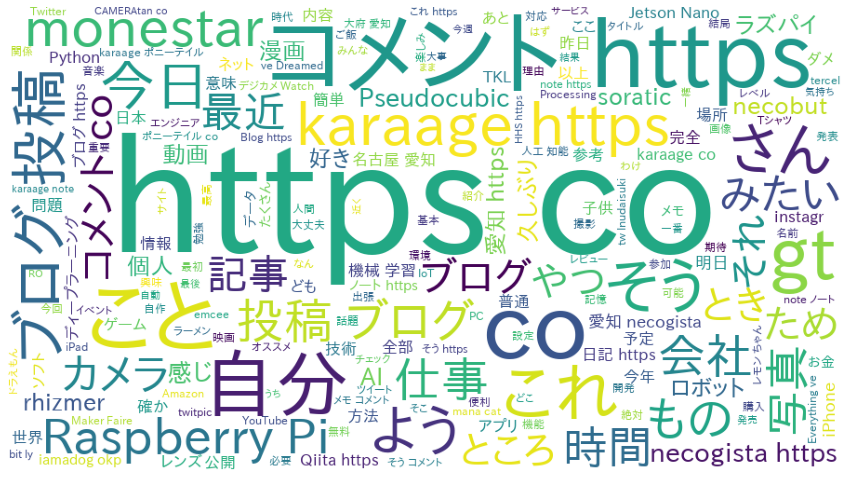

In [ ]:
fpath = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500).generate(text)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## データの前処理追加

In [ ]:
import re
re.sub(r'からあげ','', '私はからあげです')

'私はです'

再度テキストを読み込みます

In [ ]:
text_list = []
with open('dogura_magura.txt', encoding='shift_jis') as f:
    text_list = f.readlines()

不要な文字を削除する関数を定義します。

In [ ]:
import re
def normalize_text(text):
    text = re.sub(r'それ', '', text)
    text = re.sub(r'よう', '', text)
    text = re.sub(r'もの', '', text)
    text = re.sub(r'これ', '', text)
    text = re.sub(r'うち', '', text)
    text = re.sub(r'ここ', '', text)
    text = re.sub(r'こと', '', text)
    text = re.sub(r'もの', '', text)
    text = re.sub(r'そう', '', text)
    text = re.sub(r'\n', '', text)
    text = text.strip()
    return text

In [ ]:
new_text_list = []
for text in text_list:
    text = normalize_text(text)
    new_text_list.append(text)

In [ ]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
words = []
for text in new_text_list:
    tokens = t.tokenize(text)
    for token in tokens:
        pos = token.part_of_speech.split(',')[0]
        if pos == '名詞':
            words.append(token.surface)

text = ' '.join(words)

In [ ]:
text[500:600]

'ペンキ 塗 天井 裏 薄 塵埃 ほこり 蔽 裸 電球 タッタ 一つ ブラ 赤 硝子 球 ガラス だま 横腹 蠅 はえ 一 匹 凝然 真下 人造 石 床 上 私 大の字 型 なり 私 大の字 型 なり '

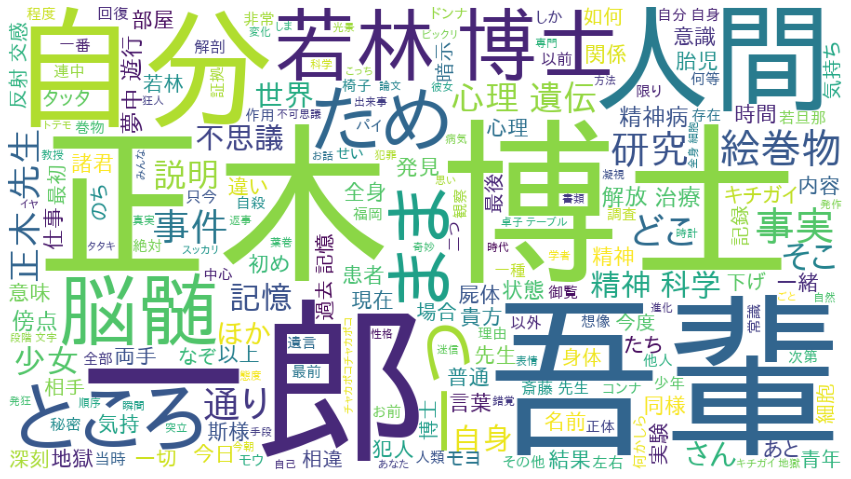

In [ ]:
fpath = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500).generate(text)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Word2Vecで可視化

最初に分かち書きした文章を、テキストファイルに保存します。

In [ ]:
filename='wakachi_text.txt'
with open(filename, 'w', encoding='utf-8') as f:
    f.write(text)
print("file is saved")

file is saved


In [ ]:
print(text[0:500])

ドグラ・マグラ 夢野 久作 ------------------------------------------------------- テキスト 中 記号 ルビ 例 蜜蜂 みつば ルビ 文字 列 始まり 特定 記号 例 大の字 型 なり ＃］： 入力 者 注 主 外字 説明 傍点 位置 指定 数字 JIS X 0213 面 区点 番号 Unicode 底本 ページ 行 数 例 ）※［＃ ローマ 数字 1 1 - 13 - 21 ＃…］： 点 例 五 月 於 ［＃ 二 二 倍 踊り字 縦 形 繰り返し 記号 例 やう 語り 出 づるやう 濁点 付き 二 倍 踊り字 ／″＼」 ------------------------------------------------------- ＃ ページ 左右 中央 ＃ ５ 字 下げ 巻頭 歌 胎児 胎児 母親 心 の ＃ 字 ＃ 改 ページ ブウウ ンンン ンンンン 私 ウスウス 眼 時 蜜蜂 みつば 音 弾力 余韻 私 耳 穴 中 ジッ 今 真夜中 直覚 どこ 近く ボンボン 時計 ん 蜜蜂 の 余韻 そこ ら 中 ヒッソリ 私 眼 白 


In [ ]:
!cat wakachi_text.txt

このファイルは、インターネットの図書館、青空文庫（http://www.aozora.gr.jp/）で作られました．入力、校正、制作にあたったのは、ボランティアの皆さんです。

ライブラリをインストールします。

In [ ]:
#!pip install gensim

In [ ]:
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) # 今どれくらい処理が進んでるか確認する用
sentences = word2vec.LineSentence('wakachi_text.txt')
model = word2vec.Word2Vec(sentences,
                          sg=1,         #0: CBOW, 1: skip-gram
                          size=300,     # ベクトルの次元数
                          window=5,    # 入力単語からの最大距離
                          min_count=5,  # 単語の出現回数でフィルタリング
                          )

model.save("./word2vec.model")

2020-04-08 15:48:12,974 : INFO : collecting all words and their counts
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-04-08 15:48:12,995 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-08 15:48:13,022 : INFO : collected 11963 word types from a corpus of 89539 raw words and 9 sentences
2020-04-08 15:48:13,027 : INFO : Loading a fresh vocabulary
2020-04-08 15:48:13,040 : INFO : effective_min_count=5 retains 2943 unique words (24% of original 11963, drops 9020)
2020-04-08 15:48:13,041 : INFO : effective_min_count=5 leaves 74320 word corpus (83% of original 89539, drops 15219)
2020-04-08 15:48:13,054 : INFO : deleting the raw counts dictionary of 11

In [ ]:
with open('vector.tsv', 'w', encoding='utf-8') as f, \
     open('metadata.tsv', 'w', encoding='utf-8') as g:

    # metadata file needs header for over two words
    # g.write('Word\n')

    for word in model.wv.vocab.keys():
        embedding = model.wv[word]

        # Save vector TSV file
        f.write('\t'.join([('%f' % x) for x in embedding]) + '\n')

        # Save metadata TSV file
        g.write(word + '\n')

ファイルのダウンロード

In [ ]:
from google.colab import files
files.download('vector.tsv')
files.download('metadata.tsv')